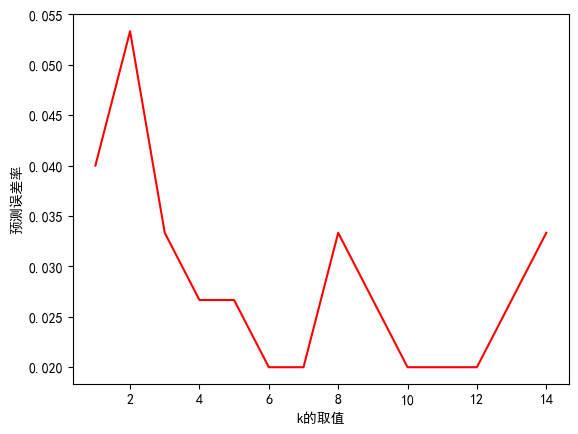

In [1]:
#项目8-例8-1代码
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


#拆分数据集
x,y=load_iris().data,load_iris().target   
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.5)

#k取不同值的情况下，模型的预测误差率计算
k_range=range(1,15)         #设置k值的取值范围
k_error=[]                  #k_error用于保存预测误差率数据
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')#5折交叉验证
    k_error.append(1-scores.mean())              

#画图，x轴表示k的取值，y轴表示预测误差率
plt.rcParams['font.sans-serif']='Simhei'
plt.plot(k_range,k_error,'r-')
plt.xlabel('k的取值')
plt.ylabel('预测误差率')
plt.show()

In [2]:
#定义模型
kNNmodel=KNeighborsClassifier(6) #k近邻模型
Baggingmodel=BaggingClassifier(KNeighborsClassifier(6),n_estimators=130,max_samples=0.4,max_features=4,random_state=1)#Bagging模型

#训练模型
kNNmodel.fit(x_train,y_train)
Baggingmodel.fit(x_train,y_train)
#评估模型
kNN_pre=kNNmodel.predict(x_test)
kNN_ac=accuracy_score(y_test,kNN_pre)
print("k近邻模型预测准确率：",kNN_ac)
Bagging_pre=Baggingmodel.predict(x_test)
Bagging_ac=accuracy_score(y_test,Bagging_pre)
print("基于k近邻算法的Bagging模型的预测准确率：",Bagging_ac)

k近邻模型预测准确率： 0.9333333333333333
基于k近邻算法的Bagging模型的预测准确率： 0.9466666666666667
